In [10]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

import os
print(os.getcwd())
data = pd.read_csv('clustering.csv')
print(data.head())


d:\Python\LatihanPythonAmir\pola\RegresiLinear\knn
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural           N  
1             1

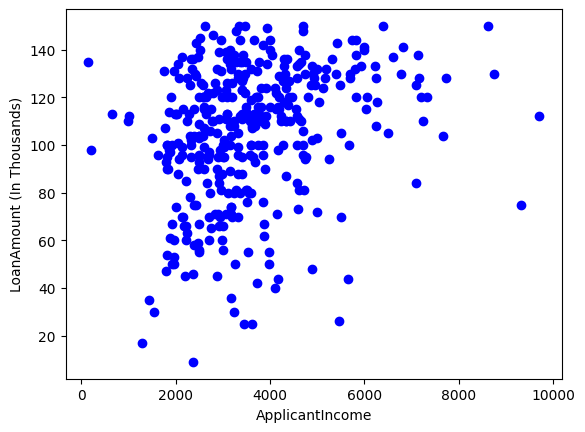

In [11]:
X = data[["ApplicantIncome", 'LoanAmount']]

#visualize data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='blue')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount (In Thousands)')
plt.show()

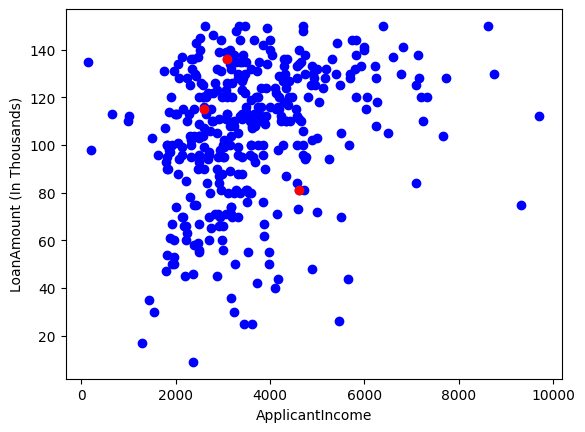

In [12]:
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='blue')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount (In Thousands)')
plt.show()

In [13]:
print(Centroids)

     ApplicantIncome  LoanAmount
271             4606        81.0
13              2600       115.0
361             3087       136.0


0.0


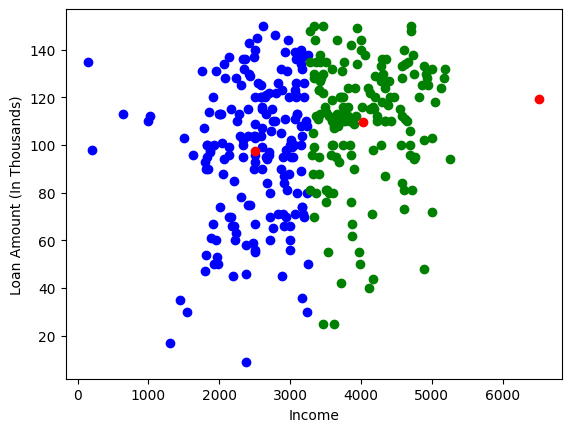

In [16]:
#step 3 assign all the points to the closest cluster centroid
#step 4 recompute centroids of newly formed clusters
#step 5 repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    X = X.copy()  # Fix: Replace XD with X
    i=0
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in X.iterrows():  # Fix: Replace XD with X
            d1 = (row_c["ApplicantIncome"]- row_d["ApplicantIncome"])**2  # Fix: Correct the typo in "ApplicantIncome"
            d2 = (row_c["LoanAmount"]- row_d["LoanAmount"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1

    C=[]
    for index, row in X.iterrows():
        min_dist=row[0]
        pos=0
        for i in range(K):
            if row[i] < min_dist:
                min_dist = row[i]
                pos=i
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j = j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

#visualize data points
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()